# Applied Machine Learning 

### Personal Project

HMWRK from CPSC330

## Table of contents
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. (Challenging) [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. (Challenging) [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. (Challenging) [Your takeaway from the course](#15)

## Imports

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (
    GridSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier

Solving environment: done

# All requested packages already installed.



<!-- BEGIN QUESTION -->



In [ ]:
print("hello")

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this assignment we'll be exploring a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset. In this assignment we'll try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. You can find this information in the documentation on. You can find an explaination of the features [here](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit).  Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe.

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

#### Question 1
In this data set we are going to help predict the popularity of a listing which is defined as `reviews_per_month`. There are 16 features which include both categorical and numeric features.

Upon first inspection there are some features which could be dropped, this includes host name which would likely be redundant. Other features which could be dropped include id features which may cause over-fitting. More inspections needs to be done on other features which could be dropped.

Input features which are of interest include `number_of_reviews`, this is likely to be highly correlated with `reviews_per_month`. `Price` may also be a feature of interest, generally speaking cheaper listings will attract more guests and have a higher turnover rate which could affect the popularity of the listing. 

*Ultimately, further research will need to be done to look at the importance of the features at hand.*




In [ ]:
data = pd.read_csv("data/AB_NYC_2019.csv")
data.head(5)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>


<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [440]:
from sklearn.model_selection import train_test_split


# Split the data into train and test sets
train_df, test_df = train_test_split(data, test_size=0.3, random_state=123)

# train_df contain 70% of the data for training
# test_df will contain 30% of the data for testing
train_df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
36150,28736148,Cozy 1 Bedroom Apt in Hamilton Heights,43431867,Tommy,Manhattan,Washington Heights,40.83256,-73.94440,Entire home/apt,96,4,0,NaN,NaN,1,17
45223,34613254,Amazing One Bedroom at the Time Square Area/72B,48146336,Irina,Manhattan,Hell's Kitchen,40.76134,-73.99299,Entire home/apt,150,30,0,NaN,NaN,20,332
14316,11144496,"New Spacious Master, Williamsburg",48819868,Nick,Brooklyn,Williamsburg,40.71119,-73.95097,Private room,200,1,0,NaN,NaN,1,0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

## Summary of Initial Observations

#### Visualization Analysis
Our intital EDA found that lower priced listings tend to have a larger volume of reviews per month (`Visualization 1`). This makes sense as inexpensive listings will likely be more popular as they are more accesible to the wider population, leading to more reviews. 

`Visualization 4` found there are some differences in neighbourhood vs Reviews per month. Upon further assessment, we recognize the `neighbourhood group` is essentially a discretization of `longitude and latitude`. Neighbourhood groups is easier to interpret in comparison, this has prompted us to *drop the longitude and latitude columns.* Doing so will help reduce the dimensionality of the data, which will be beneficial for model training as it simplifies the model. In addition, geospatial coordinates may be too highly specific which could lead to over-fitting. Considering this information, we will omit them from our model. 

In terms of growth, `Visualization 7 & 8` indicated there is a clear growth trend which largely accelerated in 2019. The large growth in 2019 may suggest some external factors contributed to this rapid increase but we cannot be sure. `Visualization 9` was created to look at potential seasonal trends but found no clear evidence of linear trends as correlation was quite low. We can seperate last_review into year, month and day to obtain further information.

Ultimately, number of reviews, price, availability 365 and calculated host listings seem to have the strongest correlation based on our heatmap in `Visualization 6` with number of reviews having the strongest correlation. 


#### Summary Statistics
- The describe() function provides key summary statistics for numerical columns, including count, mean, standard deviation, minimum, and maximum. This helps us understand the central tendency and spread of our data.

- train.dtypes tolds us that `last_review` had an object datatype, we can convert this with pd.to_datetime to help with the usability of the data.

- train_info() and train.shape[0] tells us that we have 34226 rows and features like 'name' 'host_name' 'last_review' and 'reviews_per_month' have NaN values which need to be imputed.

- Our correlation matrix tells us number of reviews has the highest correlation with reviews per month at `0.587901`

- There are no duplicate IDs which suggests we don't have duplicate rows.


### Appropriate Metrics
As we will be performing regression, the metrics we will be using will be R-squared, which indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. The reason why we chose this metric is because it provides a quick and interpretable measure of how well our model is capturing the variance in the data.

Another metric we will be using is fit time. There is often a trade-off between model complexity, performance, and computational efficiency. This trade-off is navigated using the purpose of your analysis. For example, in real-time bidding systems, a model must be very fast, often at the expense of some accuracy, while in financial forecasting, accuracy is critical, potentially at the cost of longer computation times. We will aim for a model that is not too computationally expensive due to the nature of this assignment. 

### Summary Statistics

In [441]:
train_df.shape

(34226, 16)

In [442]:
train_df.columns
# Original Columns:
# Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
#        'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
#        'minimum_nights', 'number_of_reviews', 'last_review',
#        'reviews_per_month', 'calculated_host_listings_count',
#        'availability_365'],
#       dtype='object')

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [443]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34226 entries, 36150 to 15725
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              34226 non-null  int64  
 1   name                            34216 non-null  object 
 2   host_id                         34226 non-null  int64  
 3   host_name                       34209 non-null  object 
 4   neighbourhood_group             34226 non-null  object 
 5   neighbourhood                   34226 non-null  object 
 6   latitude                        34226 non-null  float64
 7   longitude                       34226 non-null  float64
 8   room_type                       34226 non-null  object 
 9   price                           34226 non-null  int64  
 10  minimum_nights                  34226 non-null  int64  
 11  number_of_reviews               34226 non-null  int64  
 12  last_review                     2

In [444]:
train_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.422600e+04,3.422600e+04,34226.000000,34226.000000,34226.000000,34226.000000,34226.000000,27236.000000,34226.000000,34226.000000
mean,1.893979e+07,6.726273e+07,40.729142,-73.952083,151.528399,7.094957,23.244814,1.369816,7.042453,112.526004
std,1.101332e+07,7.840511e+07,0.054531,0.046201,236.628392,21.548290,44.573323,1.700737,32.590803,131.420031
min,2.539000e+03,2.438000e+03,40.506410,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.394482e+06,7.721897e+06,40.690193,-73.983030,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.954546e+07,3.074526e+07,40.723240,-73.955550,106.000000,3.000000,5.000000,0.710000,1.000000,45.000000
75%,2.915085e+07,1.068375e+08,40.763287,-73.936270,175.000000,5.000000,23.000000,2.000000,2.000000,225.750000
max,3.648561e+07,2.743213e+08,40.912340,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [445]:
summary_statistics_reviews_per_month = train_df['reviews_per_month'].describe()
summary_statistics_reviews_per_month


count    27236.000000
mean         1.369816
std          1.700737
min          0.010000
25%          0.190000
50%          0.710000
75%          2.000000
max         58.500000
Name: reviews_per_month, dtype: float64

In [446]:
numerical_variables = ['price', 'minimum_nights',
                       'number_of_reviews', 'calculated_host_listings_count', 
                       'availability_365', 'reviews_per_month']


correlation_matrix = train_df[numerical_variables].corr()

# Correlation Matrix of Numerical Features
correlation_matrix


,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,reviews_per_month
price,1.000000,0.031717,-0.047802,0.060032,0.085142,-0.033062
minimum_nights,0.031717,1.000000,-0.074642,0.123040,0.139341,-0.111594
number_of_reviews,-0.047802,-0.074642,1.000000,-0.071658,0.172544,0.548976
calculated_host_listings_count,0.060032,0.123040,-0.071658,1.000000,0.226027,-0.010565
availability_365,0.085142,0.139341,0.172544,0.226027,1.000000,0.187546
reviews_per_month,-0.033062,-0.111594,0.548976,-0.010565,0.187546,1.000000


In [447]:
for col in train_df.columns:
    print(f'Name: {col} | Number of Duplicates: {train_df[col].duplicated().sum()}')

Name: id | Number of Duplicates: 0
Name: name | Number of Duplicates: 563
Name: host_id | Number of Duplicates: 6707
Name: host_name | Number of Duplicates: 25024
Name: neighbourhood_group | Number of Duplicates: 34221
Name: neighbourhood | Number of Duplicates: 34008
Name: latitude | Number of Duplicates: 17772
Name: longitude | Number of Duplicates: 21275
Name: room_type | Number of Duplicates: 34223
Name: price | Number of Duplicates: 33614
Name: minimum_nights | Number of Duplicates: 34127
Name: number_of_reviews | Number of Duplicates: 33856
Name: last_review | Number of Duplicates: 32549
Name: reviews_per_month | Number of Duplicates: 33338
Name: calculated_host_listings_count | Number of Duplicates: 34179
Name: availability_365 | Number of Duplicates: 33860


#### Visualization 1: Price v. Number of Reviews Coloured by Room Type
- A scatterplot investigating price plotted against number of reviews coloured by one of three 
room types (Entire Home, Private Room, Shared Room)

- We find that data with lower prices have more reviews, indicating that those looking for airbnbs
prefer to find lower priced listings. 

/Users/OliverGullery/miniconda3/envs/cpsc330/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/OliverGullery/miniconda3/envs/cpsc330/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/OliverGullery/miniconda3/envs/cpsc330/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/OliverGullery/miniconda3/envs/cpsc330/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

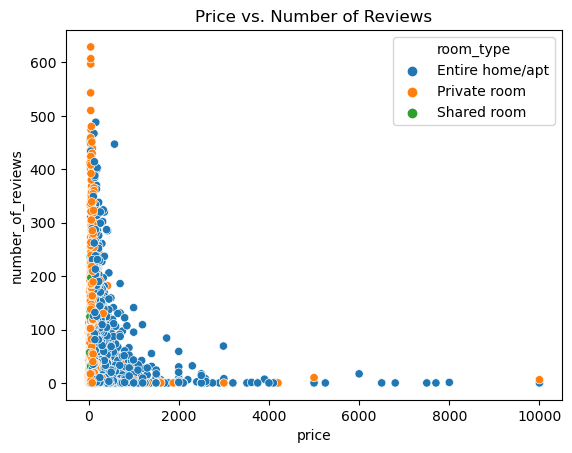

In [448]:

ax =sns.scatterplot(x='price',
                y='number_of_reviews',
                hue='room_type',
                data=train_df)
ax.set_title('Price vs. Number of Reviews')
plt.show()


#### Visualization 2: Price v. Reviews Per Month Coloured by Room Type

- A scatterplot investigating price plotted against reviews per month coloured by one of three room types (Entire Home, Private Room, Shared Room)

- We find that data with lower prices have more reviews per month,
again, strengthing our hypothesis that lower prices get more reviews and are more popular

/Users/OliverGullery/miniconda3/envs/cpsc330/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/OliverGullery/miniconda3/envs/cpsc330/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/OliverGullery/miniconda3/envs/cpsc330/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/OliverGullery/miniconda3/envs/cpsc330/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

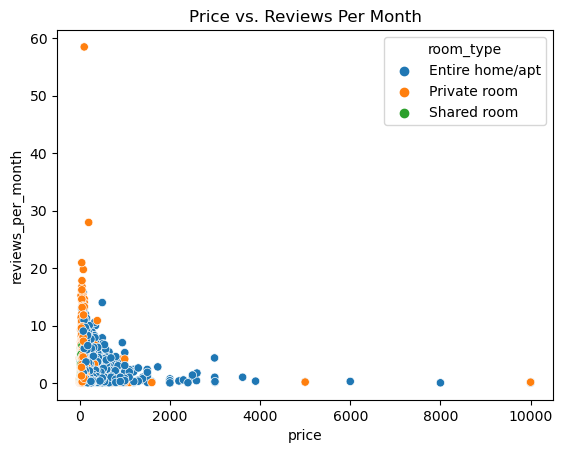

In [449]:
ax =sns.scatterplot(x='price',
                y='reviews_per_month',
                hue='room_type',
                data=train_df)
ax.set_title('Price vs. Reviews Per Month')
plt.show()

#### Visuazation 3. Number of Reviews vs Reviews Per Month

- A scatter plot of number of reviews against reviews per month

- There is some evidence of a correlation between number of reviews per month and number of reviews. Listings with high number of reviews but low reviews per month may be older listings.

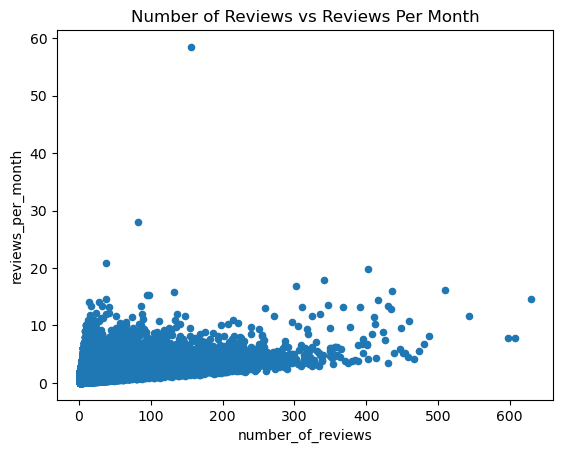

In [450]:
train_df.plot(kind='scatter',
        x='number_of_reviews',
        y='reviews_per_month',
        title='Number of Reviews vs Reviews Per Month')
plt.show()

#### Visuazation 4. Boxplot of Neighbourhood group vs Reviews Per Month With Outliers Removed

- A boxplot with room type and reviews per month with outliers removed to help with the readability of the plots, from this graph we can infer that most areas median are similar with queens generally getting more reviews than other neighbourhoods.

- These boxplots suggest there are some difference in reviews per months amongst different neighbourhood groups. 

/Users/OliverGullery/miniconda3/envs/cpsc330/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/OliverGullery/miniconda3/envs/cpsc330/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/OliverGullery/miniconda3/envs/cpsc330/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


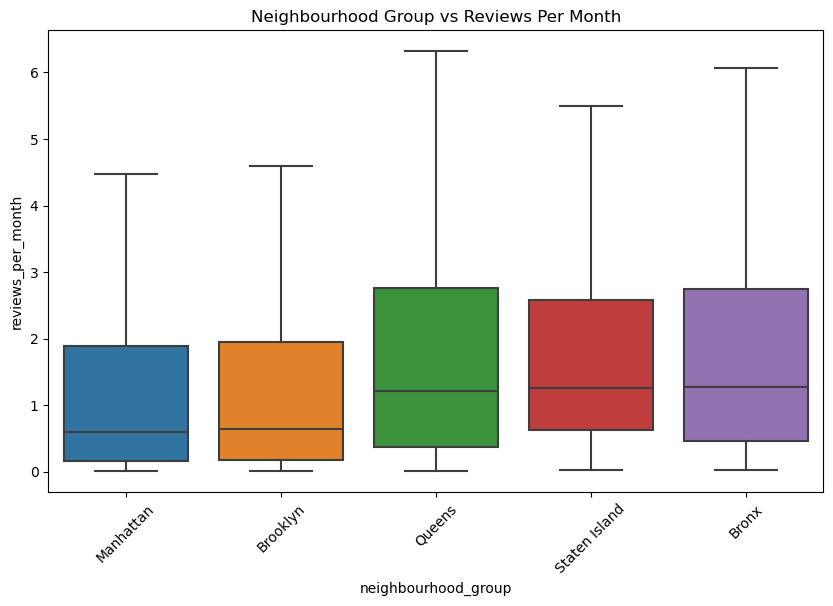

In [451]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='neighbourhood_group', y='reviews_per_month', data=train_df, showfliers=False)
plt.title('Neighbourhood Group vs Reviews Per Month')
plt.xticks(rotation=45)
plt.show()

#### Visuazation 5. Boxplot of Room Types vs Reviews Per Month With Outliers Removed

- This is a Boxplot of Room Types vs Reviews Per Month With Outliers Removed for readability.

- From this graph we can infer that room type may not have a large effect on our target variable.

/Users/OliverGullery/miniconda3/envs/cpsc330/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/OliverGullery/miniconda3/envs/cpsc330/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/OliverGullery/miniconda3/envs/cpsc330/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


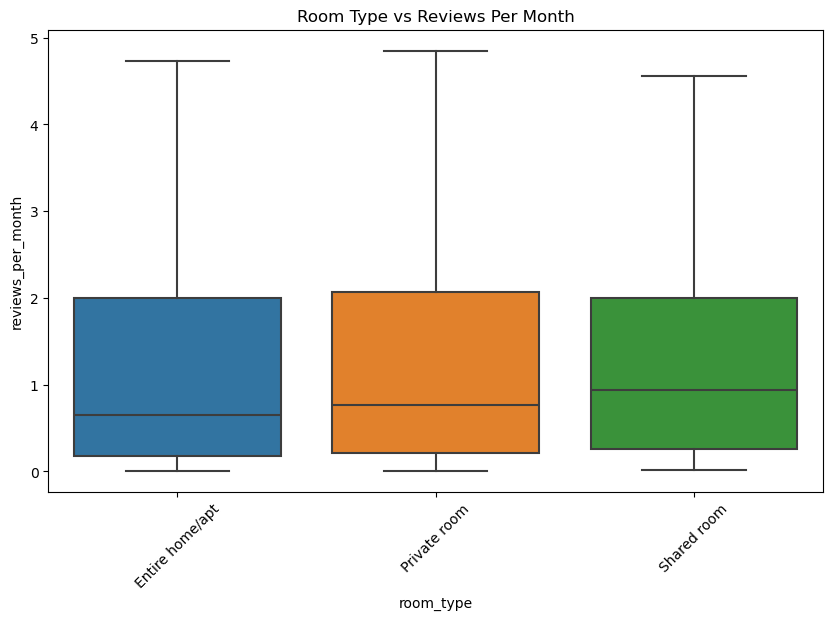

In [452]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='reviews_per_month', data=train_df, showfliers=False)
plt.title('Room Type vs Reviews Per Month')
plt.xticks(rotation=45)
plt.show()

#### Visuazation 6. Heatmap of Correlation matrix between all numerical Variables

- A heatmap of the correlation between out different numerical variables

- Reviews per month and number of reviews seem to have the strongest correlation as expected.

- Reviews per month and availably 365 also have some correlation as rooms available 365 days of the year will likely have more reviews per month


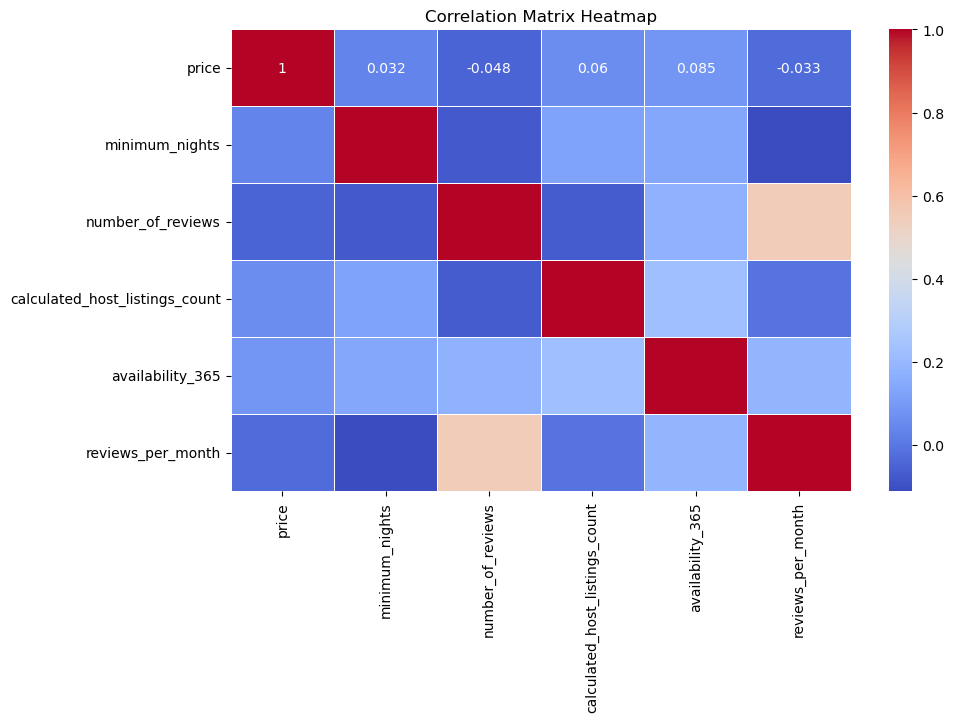

In [453]:
numerical_variables = ['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365', 'reviews_per_month']


subset_data = train_df[numerical_variables]


correlation_matrix = subset_data.corr()

# heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


#### Visualization 7. Reviews Per Month Over time

- Lineplot of reviews per month over time

- We converted last_review to pd datetime format for our graph

- It seems reviews seem to increase a lot more in recent times, we should make note of the rapid accelerated increase in 2019, these may be caused by some externals factors but we cannot be sure. 

/Users/OliverGullery/miniconda3/envs/cpsc330/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/OliverGullery/miniconda3/envs/cpsc330/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/OliverGullery/miniconda3/envs/cpsc330/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/OliverGullery/miniconda3/envs/cpsc330/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na 

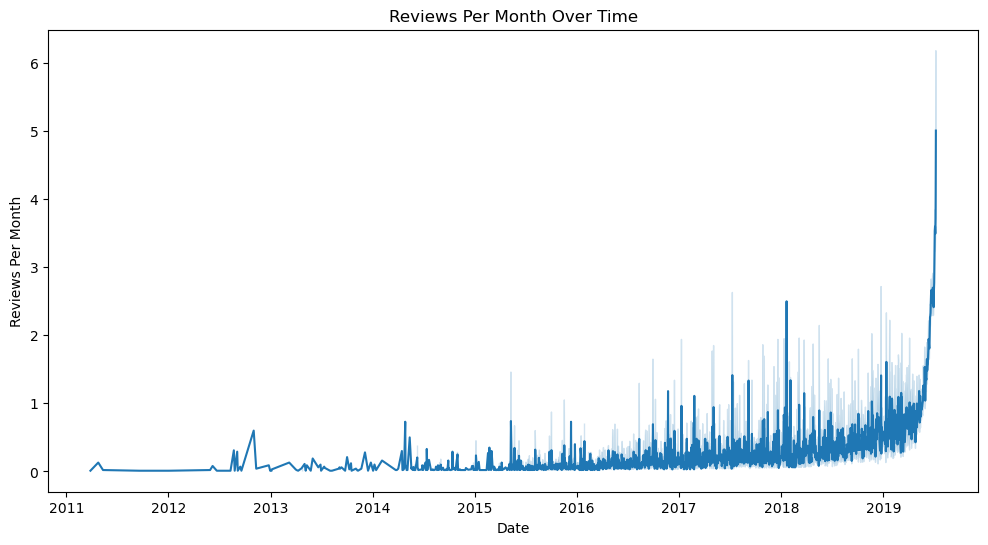

In [454]:
train_df['last_review'] = pd.to_datetime(train_df['last_review'])

plt.figure(figsize=(12, 6))
sns.lineplot(x='last_review', y='reviews_per_month', data=train_df)
plt.title('Reviews Per Month Over Time')
plt.xlabel('Date')
plt.ylabel('Reviews Per Month')
plt.show()

#### Visulisation 8. Reviews Per Month by year with outliers removed

- A box plot of reviews per month by year with outliers removed

- We see clear acclerated growth overtime, especially in the year 2019

/Users/OliverGullery/miniconda3/envs/cpsc330/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/OliverGullery/miniconda3/envs/cpsc330/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/OliverGullery/miniconda3/envs/cpsc330/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


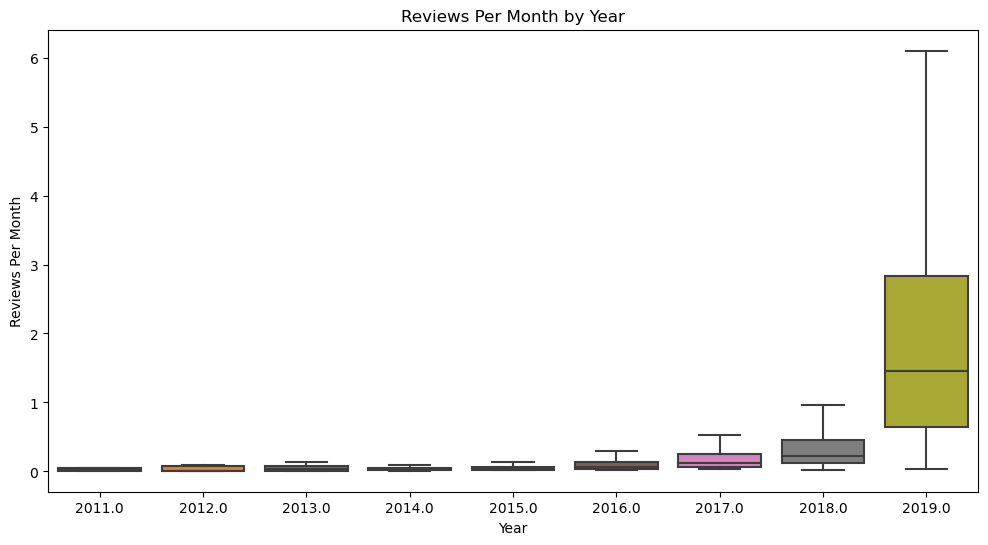

In [455]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=train_df['last_review'].dt.year, y=train_df['reviews_per_month'], showfliers = False)
plt.title('Reviews Per Month by Year')
plt.xlabel('Year')
plt.ylabel('Reviews Per Month')
plt.show()

#### Visulisation 9. Reviews Per Month vs one-year lagged reviews per month

- We lagged reviews per month by 12 to see if the reviews of a previous month could predict the reviews of the next year in order to account for seasonal trends.

- There seems to be no correlation between the lagged reviews per month and reviews in current month. This could indicate lack of seasonal trends (or at least no linear relationship) but you would need to look into the data further to discover more.

- In order to extrapolate more information from last_review, we would separate it into year, month, and day and use them as three separate numerical features. 

/Users/OliverGullery/miniconda3/envs/cpsc330/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/OliverGullery/miniconda3/envs/cpsc330/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


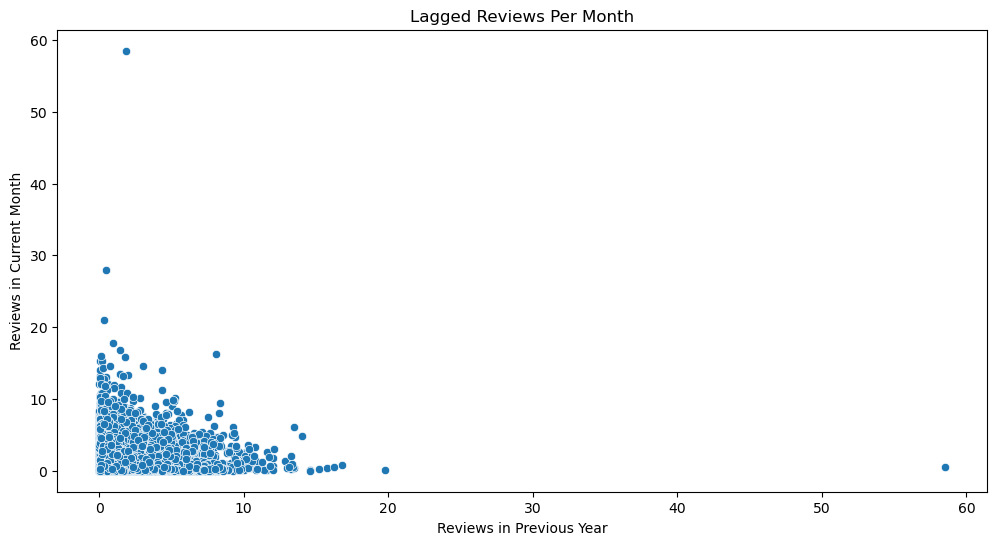

Correlation between Lagged Reviews and Current Reviews: -0.004679746851496089


In [456]:
train_df['lagged_reviews'] = train_df['reviews_per_month'].shift(12)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='lagged_reviews', y='reviews_per_month', data=train_df)
plt.title('Lagged Reviews Per Month')
plt.xlabel('Reviews in Previous Year')
plt.ylabel('Reviews in Current Month')
plt.show()
correlation = train_df['lagged_reviews'].corr(train_df['reviews_per_month'])
print("Correlation between Lagged Reviews and Current Reviews:", correlation)

#### Visulisation 10. Reviews Per Month vs lagged reviews per month 

- We lagged reviews per month by 1 to see if the reviews of a previous month could predict the reviews of the next month

- There seems to be no correlation between the lagged reviews per month and reviews in current month. 

/Users/OliverGullery/miniconda3/envs/cpsc330/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/OliverGullery/miniconda3/envs/cpsc330/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


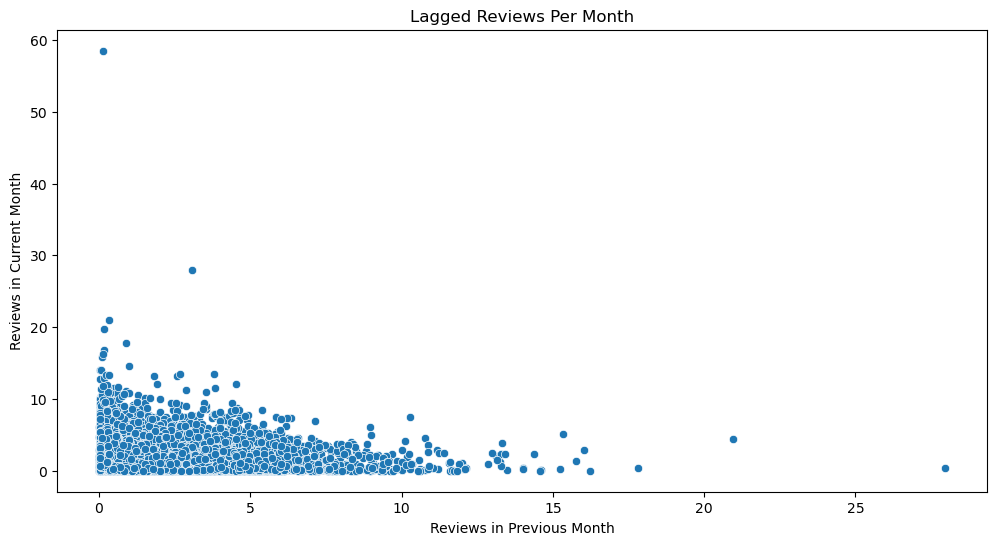

Correlation between Lagged Reviews and Current Reviews: -0.004180893595007159


In [457]:
train_df['lagged_reviews'] = train_df['reviews_per_month'].shift(1)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='lagged_reviews', y='reviews_per_month', data=train_df)
plt.title('Lagged Reviews Per Month')
plt.xlabel('Reviews in Previous Month')
plt.ylabel('Reviews in Current Month')
plt.show()
correlation = train_df['lagged_reviews'].corr(train_df['reviews_per_month'])
print("Correlation between Lagged Reviews and Current Reviews:", correlation)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## (Challenging) 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

In [458]:

X = data.drop('reviews_per_month', axis=1)  
y = data['reviews_per_month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)



#### Seperating last_review into Separate Numerical Features

- Note: We converted train_df['last_review'] to pd datetime format earlier on.

In [459]:
# Convert the 'last_review' column to a datetime data type
X_train['last_review'] = pd.to_datetime(X_train['last_review'])
X_test['last_review'] = pd.to_datetime(X_test['last_review'])

# Extract year, month, and day into new columns
X_train['review_year'] = X_train['last_review'].dt.year
X_train['review_month'] = X_train['last_review'].dt.month
X_train['review_day'] = X_train['last_review'].dt.day

X_test['review_year'] = X_test['last_review'].dt.year
X_test['review_month'] = X_test['last_review'].dt.month
X_test['review_day'] = X_test['last_review'].dt.day


### Feature discretization

#### Price Category

- Through discretizting price into different categories it can help with out decision tree model.

In [460]:
X_train['price_category'] = pd.cut(
    X_train['price'],
    bins=[-float('inf'), 50, 100, 150, 200, 250, 300, 350, float('inf')],
    labels=['0-50', '50-100', '100-150', '150-200', '200-250', '250-300', '300-350', '350+'],
    include_lowest=True
)

X_test['price_category'] = pd.cut(
    X_test['price'],
    bins=[-float('inf'), 50, 100, 150, 200, 250, 300, 350, float('inf')],
    labels=['0-50', '50-100', '100-150', '150-200', '200-250', '250-300', '300-350', '350+'],
    include_lowest=True
)

X_train['price_category'].info()

<class 'pandas.core.series.Series'>
Index: 34226 entries, 36150 to 15725
Series name: price_category
Non-Null Count  Dtype   
--------------  -----   
34226 non-null  category
dtypes: category(1)
memory usage: 301.2 KB


#### Minimum Nights Category

Minimum nights are mostly concentrated amongst lower ranges, thus, we decided that creating bins up to 30 in increments of 5 would provide more insight as opposed to treating the data like a continuous variable. 

In [461]:
X_train['minimum_nights_category'] = pd.cut(
    X_train['minimum_nights'],
    bins=[0, 5, 10, 15, 20, 25, 30, float('inf')],
    labels=['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30+']
)

X_test['minimum_nights_category'] = pd.cut(
    X_test['minimum_nights'],
    bins=[0, 5, 10, 15, 20, 25, 30, float('inf')],
    labels=['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30+']
)


X_test['minimum_nights_category'].info()

<class 'pandas.core.series.Series'>
Index: 14669 entries, 29122 to 6162
Series name: minimum_nights_category
Non-Null Count  Dtype   
--------------  -----   
14669 non-null  category
dtypes: category(1)
memory usage: 129.3 KB


#### Superhost (Calculated host listings count > threshold)
A host with many properties might be more experienced, we can create a binary indicator using a threshold, for this sceanrio I will use a threshold of 5.



In [462]:
threshold = 5
X_train['is_superhost'] = X_train['calculated_host_listings_count'] > threshold

X_test['is_superhost'] = X_test['calculated_host_listings_count'] > threshold


X_train.columns


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'calculated_host_listings_count', 'availability_365', 'review_year',
       'review_month', 'review_day', 'price_category',
       'minimum_nights_category', 'is_superhost'],
      dtype='object')

#### Null Values in y_train and y_test

- As we can see there are reviews per month put null values any time `review_per_month` was 0, thus we can impute zero into null values in this column

In [463]:
np.isnan(y_train).sum()
# Filling in Reviews_per_month null values
y_train = np.where(np.isnan(y_train), 0, y_train)
y_test = np.where(np.isnan(y_train), 0, y_train)
np.isnan(y_train).sum()

0

In [464]:
# y_train = SimpleImputer(strategy='constant', fill_value=0)


# y_train = y_imputer.fit_transform(y.values.reshape(-1, 1))


# y_train = y_imputed.ravel()

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify any data cleaning that needs to be done and perform it.
2. Identify different feature types and the transformations you would apply on each feature type. 
3. Define a column transformer, if necessary.
4. You have likely noticed the `number_of_reviews` feature will be higly informative for the target `reviews_per_month`. To make this assignment more interesting **drop** the `number_of_reviews` feature.

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

#### List of our Features

In [465]:
numerical_features = ['price', 
                   'minimum_nights', 
                   'calculated_host_listings_count',
                   'availability_365',
                  'review_year',
                    'review_month', 
                      'review_day',]

categorical_features = ['neighbourhood_group', 
                     'neighbourhood',
                     'room_type']

ordinal_features = ['price_category', 
                 'minimum_nights_category']

binary_features = ['is_superhost']

# text_data = ['name'] # took too long for count vectorizer

drop_features = ['number_of_reviews', 
                 'host_id', 'id',
                 'last_review',
                 'host_name','latitude', 'longitude', 'name']

target = ['reviews_per_month']


In [466]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder


# Transformer for binary features: convert boolean to numeric then apply imputation
def bool_to_numeric(x):
    # Convert boolean to int (True to 1, False to 0)
    return x.astype(int)

binary_transformer = Pipeline(steps=[
    ('convert_to_numeric', FunctionTransformer(bool_to_numeric)),
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Now imputer can handle it because it's numeric
    # No need to encode since it's already in binary (0/1) format
])


In [467]:
price_category_ordering = ['0-50',
                           '50-100', 
                           '100-150', 
                           '150-200',
                           '200-250', 
                           '250-300', 
                           '300-350', 
                           '350+']
 
minimum_nights_category_ordering = ['0-5',
                                    '5-10', 
                                    '10-15', 
                                    '15-20',
                                    '20-25', 
                                    '25-30', 
                                    '30+']

ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # To handle missing values
    ('ordinal', OrdinalEncoder(categories=[price_category_ordering, 
                                           minimum_nights_category_ordering]))
])



# Create the column transformer
ct = make_column_transformer(
    ('drop', drop_features), 
    (StandardScaler(), numerical_features),  
    (OneHotEncoder(handle_unknown="ignore"), categorical_features),  
    (ordinal_transformer, ordinal_features),  
    (binary_transformer, binary_features),
    remainder='passthrough'  
)


In [468]:
from sklearn.impute import SimpleImputer

freq_imputer = SimpleImputer(strategy='most_frequent')

X_train[['review_month', 'review_day']] = freq_imputer.fit_transform(X_train[['review_month', 'review_day']])
X_test[['review_month', 'review_day']] = freq_imputer.fit_transform(X_test[['review_month', 'review_day']])

In [469]:
def random_impute_year(df, column_name):
    # Randomly choose a year based on the distribution of the existing years
    probs = df[column_name].value_counts(normalize=True)
    missing = df[column_name].isna()
    imputed_years = np.random.choice(probs.index, size=missing.sum(), p=probs.values)
    df.loc[missing, column_name] = imputed_years
    return df

X_train = random_impute_year(X_train, 'review_year')
X_test = random_impute_year(X_test, 'review_year')

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

In [470]:
from sklearn.dummy import DummyRegressor #import regressor

reg = DummyRegressor() # Create a classifier object



In [471]:
from sklearn.pipeline import Pipeline, make_pipeline

pipe = make_pipeline(ct, reg)
pipe.fit(X_train,y_train)
pipe.predict(X_train)
f'Test Score is: {pipe.score(X_train,y_train)}'

'Test Score is: 0.0'

<!-- END QUESTION -->



<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

#### Data Summary

Ridge() regression model trained and scored quickly, but the test and train scores suggest that the model is not very accurate or that the score metric is quite low.
And at different strength of regularization (Alpha) we see that the test score is at the highest at alpha = 10 but is still low. Our results are stored in `results_df` with our best score being a test score of 0.246 with a train score of 0.254. 

Since this is a linear model and the data is showing a low score, the model and the features we are choosing might not be a linearly fit data. This makes sense as we introduced new categorical variables and ordinal variables which should work better with decision trees. 

In [472]:
# From lecture 2
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation
    """
    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

#from lecture-7
from sklearn.linear_model import Ridge 
from sklearn.model_selection import cross_val_score, cross_validate
pipe = make_pipeline(ct, Ridge())
scores =  mean_std_cross_val_scores(pipe, X_train, y_train, return_train_score=True)
pd.DataFrame(scores)

/var/folders/fy/1_r80v9j3s39nw5nw46_dw800000gq/T/ipykernel_54585/924811516.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))


,0
fit_time,0.231 (+/- 0.013)
score_time,0.014 (+/- 0.000)
test_score,0.245 (+/- 0.020)
train_score,0.257 (+/- 0.006)


In [473]:
scores_dict = {
    "alpha": 10.0 ** np.arange(-3, 6, 1)
    # "mean_train_scores": list(),
    # "mean_cv_scores": list(),
}
scores = {}
for alpha in scores_dict["alpha"]:
    pipe_ridge = make_pipeline(ct, Ridge(alpha=alpha))
    scores[f"Ridge alpha={alpha}"] = mean_std_cross_val_scores(pipe_ridge, X_train, y_train, return_train_score=True)
    # scores_dict["mean_train_scores"].append(scores["train_score"].mean())
    # scores_dict["mean_cv_scores"].append(scores["test_score"].mean())

results_df = pd.DataFrame(scores).T

/var/folders/fy/1_r80v9j3s39nw5nw46_dw800000gq/T/ipykernel_54585/924811516.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))
/var/folders/fy/1_r80v9j3s39nw5nw46_dw800000gq/T/ipykernel_54585/924811516.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))
/var/folders/fy/1_r80v9j3s39nw5nw46_dw800000gq/T/ipykernel_54585/924811516.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labe

In [474]:
results_df

,fit_time,score_time,test_score,train_score
Ridge alpha=0.001,0.282 (+/- 0.021),0.014 (+/- 0.000),0.244 (+/- 0.020),0.257 (+/- 0.006)
Ridge alpha=0.01,0.278 (+/- 0.009),0.014 (+/- 0.001),0.244 (+/- 0.020),0.257 (+/- 0.006)
Ridge alpha=0.1,0.269 (+/- 0.008),0.014 (+/- 0.001),0.244 (+/- 0.020),0.257 (+/- 0.006)
Ridge alpha=1.0,0.249 (+/- 0.037),0.015 (+/- 0.001),0.245 (+/- 0.020),0.257 (+/- 0.006)
Ridge alpha=10.0,0.160 (+/- 0.006),0.013 (+/- 0.000),0.247 (+/- 0.021),0.255 (+/- 0.006)
Ridge alpha=100.0,0.103 (+/- 0.000),0.014 (+/- 0.001),0.242 (+/- 0.019),0.246 (+/- 0.006)
Ridge alpha=1000.0,0.083 (+/- 0.003),0.014 (+/- 0.001),0.229 (+/- 0.017),0.229 (+/- 0.005)
Ridge alpha=10000.0,0.068 (+/- 0.001),0.013 (+/- 0.000),0.208 (+/- 0.014),0.207 (+/- 0.004)
Ridge alpha=100000.0,0.063 (+/- 0.004),0.013 (+/- 0.000),0.100 (+/- 0.006),0.100 (+/- 0.002)


In [475]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

### Summary

#### Random Forest
For our random forst model our test score was 0.546, which is not too bad, but this was largely overshadowed by our train score of 0.930. This exhibits large amounts of overfitting indicating the model has not generalized well to new data. Methods to improve this could be cross validation to ensure the model performs well across different subsets of data. The model also took a decent time to run at 20.966 seconds.

#### Gradient Boost Regressor
Our Gradient boost regressor model was our strongest model with a test score of 0.547 and a train score of 0.555. The closeness of the train and test scores suggest the model is not overfitting and is generalizing well for new data. However, both scores are moderate, this may indicate the model is under-fitting the data as it might be too simple to capture the underlying structure of the data. We could improve the model through optimizing the parameters of n_estimator, learning rate and max depth. 

#### KNN Neighbours Regressor
Our KNN regrssor had a test  score of 0.295 and a train score of 0.651. This indicates the model struggled to generalize to new data and was likely overfitting due to the discrepancy between train and test scores. To imrpove it we could consider parameter tuning (higher values of k) or feature scaling as KNN is sensitive to the scale of features as it relies on distance between datapoints.


### Quick Conclusion
Ultimately, our gradient boost regressor was able to beat the linear model. We experiemented with the parameters and found we could increase our test score but this was at the cost of fit time. This clearly demonstrated the trade-off between model accuracy and fit time. 

For our random forest 

## Random Forest

In [476]:
#From lecture 11
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=20, random_state=123)
y_imputed_rf = np.ravel(y_train)
pipe_rf = make_pipeline(
    ct,
    rf_regressor,
)

scores = mean_std_cross_val_scores(
    pipe_rf, X_train, y_imputed_rf, return_train_score=True
)
pd.DataFrame(scores).T

/var/folders/fy/1_r80v9j3s39nw5nw46_dw800000gq/T/ipykernel_54585/924811516.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))


,fit_time,score_time,test_score,train_score
0,20.534 (+/- 0.076),0.068 (+/- 0.014),0.546 (+/- 0.025),0.930 (+/- 0.002)


## Gradient Boost Regressor

In [493]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor
gbm = GradientBoostingRegressor(n_estimators=40, learning_rate=0.1, max_depth=3, random_state=42)

#pipeline with column-transformer and model
pipe_GBR = make_pipeline(
    ct,
    gbm,
)

# Evaluate the model
scores = mean_std_cross_val_scores(
    pipe_GBR, X_train, y_imputed_rf, return_train_score=True
)

pd.DataFrame(scores).T

/var/folders/fy/1_r80v9j3s39nw5nw46_dw800000gq/T/ipykernel_54585/924811516.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))


,fit_time,score_time,test_score,train_score
0,1.080 (+/- 0.059),0.020 (+/- 0.005),0.547 (+/- 0.033),0.555 (+/- 0.009)


## KNN Neighbours regressor

In [478]:
from sklearn.neighbors import KNeighborsRegressor

# Create KNN regressor
knn = KNeighborsRegressor(n_neighbors=3)

#pipeline with column-transformer and model
pipe_KNN = make_pipeline(
    ct,
    knn,
)

# Evaluate the model
scores = mean_std_cross_val_scores(
    pipe_KNN, X_train, y_imputed_rf, return_train_score=True
)

pd.DataFrame(scores).T

/var/folders/fy/1_r80v9j3s39nw5nw46_dw800000gq/T/ipykernel_54585/924811516.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))


,fit_time,score_time,test_score,train_score
0,0.067 (+/- 0.009),4.228 (+/- 0.134),0.297 (+/- 0.038),0.652 (+/- 0.010)


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## (Challenging) 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

#### Feature Selection Results

Our feature selection managed to reduce the amount of features whilst keeping test score the same at 0.547, train score the same at 0.555 but reducing fit time to 0.827. This shows our feature selection benefitted our model.

In [482]:
!conda install -c anaconda statsmodels -y

Solving environment: done

# All requested packages already installed.



In [483]:

import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
# import category_encoders as ce



In [484]:
X_train_imputed = ct.fit_transform(X_train)
X_test_imputed = ct.transform(X_test)

In [489]:
y_test.shape

(34226,)

In [495]:

gbm.fit(X_train_imputed, y_train)
selector = SelectFromModel(gbm, prefit=True, threshold='0.01*mean')
X_train_new = selector.transform(X_train_imputed)
X_test_new = selector.transform(X_test_imputed)
print(X_train.shape, X_train_new.shape)


reduced_model = GradientBoostingRegressor(learning_rate=0.1, max_depth=3, n_estimators=40, random_state=42)
reduced_model.fit(X_train_new, y_train)

# rmse = np.sqrt(mean_squared_error(y_test, reduced_model.predict(X_test_new)))
# rmse

# scores = mean_std_cross_val_scores(
#     pipe_GBR, X_train_new, y_imputed_rf, return_train_score=True
# )

# pd.DataFrame(scores).T
scores = mean_std_cross_val_scores(
    reduced_model, X_train_new, y_imputed_rf, return_train_score=True
)

pd.DataFrame(scores).T

(34226, 21) (34226, 18)


/var/folders/fy/1_r80v9j3s39nw5nw46_dw800000gq/T/ipykernel_54585/924811516.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))


,fit_time,score_time,test_score,train_score
0,0.827 (+/- 0.007),0.004 (+/- 0.000),0.547 (+/- 0.033),0.555 (+/- 0.009)


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

## GBM Regression

Note, when we randomly ran it we got a better value (0.547 test score and 0.554 train score). This could be due to the fact that gridsearch optimizes hyperparameters within the specified grid, and it might be missing better-performing hyperparameters that lie outside of the grid, our paramgrid is stricted by the range as the runtime gets too long if we increase in the ranges of values for each parameter. 

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid to search
param_grid = {
    # 'selectkbest__k': [5,10,15],
    'gradientboostingregressor__n_estimators': [10, 40, 100],
    'gradientboostingregressor__learning_rate': [0.05,0.1],
    'gradientboostingregressor__max_depth': [3,4],
}


# Initialize the GridSearchCV object
grid_search = GridSearchCV(pipe_GBR, param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best estimator and its parameters
best_pipeline = grid_search.best_estimator_
best_params = grid_search.best_params_

# Get the cross-validated scores for the best model
best_cv_scores = grid_search.cv_results_

# Convert the scores into a DataFrame
scores_df = pd.DataFrame(best_cv_scores)

# Display the best parameters
print("Best parameters found: ", best_params)



scores_df



## Ridge Linear Regression 

The optimal regularization strength for the Ridge regression model is alpha = 10.0, which offers the best trade-off between complexity and performance on the training data.

In [ ]:
param_grid = {"ridge__alpha": 10.0 ** np.arange(-5, 5, 1)}

pipe_ridge = make_pipeline(ct, Ridge())

search = GridSearchCV(pipe_ridge, param_grid, return_train_score=True, n_jobs=-1)
search.fit(X_train, y_train)
train_scores = search.cv_results_["mean_train_score"]
cv_scores = search.cv_results_["mean_test_score"]
plt.semilogx(param_grid["ridge__alpha"], train_scores.tolist(), label="train")
plt.semilogx(param_grid["ridge__alpha"], cv_scores.tolist(), label="cv")
plt.legend()
plt.xlabel("alpha")
plt.ylabel("score");
best_parameter = search.best_params_
print("Best parameter: ", best_parameter)
best_alpha_ridge = best_parameter

### KNN Regression

We are running grid search to have find the optimal number of neighbors and the best weigh function for the Kneighbors regressor model based on negative mean squared error.CV was reduced from 5 to 2 to reduce runtime, the range was also reduced from 1,10 to 1,3 for the same reason. 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

# Define a parameter grid to search
param_grid = {
    'kneighborsregressor__n_neighbors': range(1, 3),
    'kneighborsregressor__weights': ['uniform', 'distance']
}


grid_search = GridSearchCV(pipe_KNN, param_grid, cv=2, scoring='neg_mean_squared_error', n_jobs=-1)


grid_search.fit(X_train, y_imputed_rf)


best_knn_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = -grid_search.best_score_  


print(f"Best parameters: {best_params}")
print(f"Best score (MSE): {best_score}")


In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

We used a gradient boosting machine (GBM) model to calculate feature importances. GBM models create ensembles of decision trees, and the feature names in the importance DataFrame are often derived from the names of the columns in the training data. As a result, we couldn't find the correct names of the features from the model 

In [502]:

features = numerical_features + categorical_features + ordinal_features + binary_features
features

['price',
 'minimum_nights',
 'calculated_host_listings_count',
 'availability_365',
 'review_year',
 'review_month',
 'review_day',
 'neighbourhood_group',
 'neighbourhood',
 'room_type',
 'price_category',
 'minimum_nights_category',
 'is_superhost']

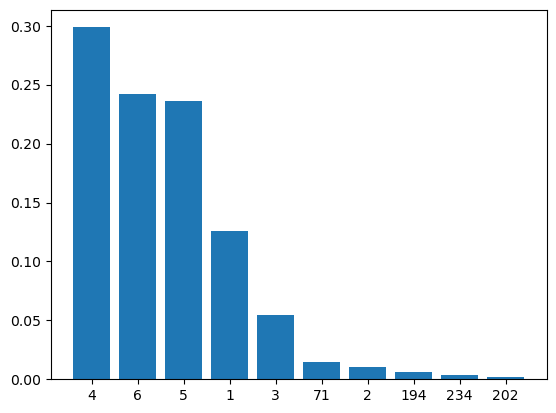

In [513]:
gbm.fit(X_train_imputed, y_train)
feature_importance = gbm.feature_importances_

sorted_indices = np.argsort(feature_importances)[::-1]

# Select the top 10 indices
top_indices = sorted_indices[:10]

# Select the corresponding feature importances
top_importances = feature_importances[top_indices]

# Create a bar plot for the top 10 feature importances
plt.bar(range(len(top_importances)), top_importances)

# Set the x-axis ticks to display feature indices
plt.xticks(range(len(top_indices)), top_indices)

# Show the plot
plt.show()

236

In [519]:
import pandas as pd



original_feature_names = list(X_train.columns)

# Generate additional feature names for the remaining 215 features
additional_feature_names = [f'feature_{i}' for i in range(1, 237)]

importance_df = pd.DataFrame({'Feature': additional_feature_names, 'Importance': feature_importance})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Print the top 10 most important features
top_10_features = importance_df.head(10)
print(top_10_features)


         Feature  Importance
4      feature_5    0.298688
6      feature_7    0.242461
5      feature_6    0.236309
1      feature_2    0.126222
3      feature_4    0.054766
71    feature_72    0.014726
2      feature_3    0.010365
194  feature_195    0.006551
234  feature_235    0.003795
202  feature_203    0.002102


In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

1. Our best performing model had a test score 0f 0.547 and a train score of 0.555. It also had a fit time of 0.856.

2. The test scores agree with the validation scores from before, this indicates that our model generlizes well to new unseen data. Regarding the extent of trust in the results, it depends on various factors, including the size and quality of the dataset, the robustness of the model, and the thoroughness of the evaluation process. Trust in the results can be increased by using cross-validation, ensuring data preprocessing is appropriate, and validating the model's assumptions. We thing we had some issues with optimization bias as our hyperparameters were fine-tuned on our validation performance (which we eventually reduced for run times sake). To mitigate optimization bias, we made sure to have a separate test set that the model has never seen during the development or tuning process.

3. Our shap imports and eli5 imports didnt work. 

In [521]:
reduced_model = GradientBoostingRegressor(learning_rate=0.1, max_depth=3, n_estimators=40, random_state=42)
reduced_model.fit(X_train_new, y_train)


scores = mean_std_cross_val_scores(
    reduced_model, X_train_new, y_imputed_rf, return_train_score=True
)

pd.DataFrame(scores).T

/var/folders/fy/1_r80v9j3s39nw5nw46_dw800000gq/T/ipykernel_54585/924811516.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))


,fit_time,score_time,test_score,train_score
0,0.861 (+/- 0.030),0.004 (+/- 0.000),0.547 (+/- 0.033),0.555 (+/- 0.009)


In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

### Concluding Remarks (Question 2.)
The summarized results show that among the considered models, the Gradient Boosting Regressor has the highest cross-validation score with parameters tuned for optimal performance. The Random Forest Regressor also performed well, but with a large discrepancy between training and test scores, suggesting overfitting.

The Ridge Regression, with its alpha set to 10.0, showed the least discrepancy between train and test scores but also the lowest overall test score, indicating it might be underfitting or that the dataset has a non-linear pattern that linear models cannot capture effectively.

The KNN Regressor has a relatively low test score compared to the ensemble methods, and a considerable difference between train and test scores, indicating overfitting. Moreover, its score time is substantially higher due to the lazy learning nature of KNN, where the algorithm uses the entire dataset to make predictions.


#### Question 3.

Data Preprocessing: More sophisticated data preprocessing could be explored, such as feature engineering, selection, or extraction methods (e.g., PCA).

Hyperparameter Tuning: A more extensive grid search or randomized search for hyperparameters could yield better-performing models, albeit at the cost of computation time.

Ensemble Techniques: Combining the predictions of several models through techniques like stacking or blending might improve overall performance.

Feature Importance: Analyzing feature importance and potentially removing non-informative features could simplify the models and potentially increase interpretability without a significant loss in performance.

Advanced Algorithms: Trying out more advanced algorithms like XGBoost, LightGBM, or CatBoost, which are more sophisticated gradient boosting algorithms and often perform better.

Model Interpretability: Tools such as SHAP or LIME could be used to gain better insight into how model predictions are being made, which could in turn inform additional feature engineering or model selection choices.

Cross-Validation Strategy: Different cross-validation strategies, like stratified or time-series splits, could provide insights into model stability across different data segments.

Dealing with Imbalanced Data: If the dataset is imbalanced, techniques like SMOTE for oversampling or different evaluation metrics that focus on the minority class could be useful.

Deep Learning: For large datasets with complex patterns, deep learning models could be considered, although they require substantial computational resources and may be less interpretable.

In [524]:
# Question 1
data = {
    "Model": [
        "Ridge Regression",
        "Random Forest Regressor",
        "Gradient Boosting Regressor",
        "KNN Regressor"
    ],
    "Optimal Parameters": [
        "alpha = 10.0",
        "n_estimators = 20",
        "learning_rate = 0.1, max_depth = 4, n_estimators = 100",
        "Not Specified"
    ],
    "Fit Time (s)": [
        "0.238 (+/- 0.020)",
        "20.966 (+/- 0.295)",
        "1.037 (+/- 0.043)",
        "0.061 (+/- 0.009)"
    ],
    "Score Time (s)": [
        "0.014 (+/- 0.001)",
        "0.064 (+/- 0.012)",
        "0.017 (+/- 0.001)",
        "3.992 (+/- 0.052)"
    ],"Test Score": [
        "0.244 (+/- 0.021)",
        "0.546 (+/- 0.026)",
        "0.547 (+/- 0.034)",
        "0.295 (+/- 0.041)"
    ],
    "Train Score": [
        "0.256 (+/- 0.006)",
        "0.930 (+/- 0.002)",
        "0.554 (+/- 0.009)",
        "0.651 (+/- 0.010)"
    ]
}

results_df = pd.DataFrame(data)
print(results_df)

                         Model  \
0             Ridge Regression   
1      Random Forest Regressor   
2  Gradient Boosting Regressor   
3                KNN Regressor   

                                  Optimal Parameters        Fit Time (s)  \
0                                       alpha = 10.0   0.238 (+/- 0.020)   
1                                  n_estimators = 20  20.966 (+/- 0.295)   
2  learning_rate = 0.1, max_depth = 4, n_estimato...   1.037 (+/- 0.043)   
3                                      Not Specified   0.061 (+/- 0.009)   

      Score Time (s)         Test Score        Train Score  
0  0.014 (+/- 0.001)  0.244 (+/- 0.021)  0.256 (+/- 0.006)  
1  0.064 (+/- 0.012)  0.546 (+/- 0.026)  0.930 (+/- 0.002)  
2  0.017 (+/- 0.001)  0.547 (+/- 0.034)  0.554 (+/- 0.009)  
3  3.992 (+/- 0.052)  0.295 (+/- 0.041)  0.651 (+/- 0.010)  


In [ ]:
...

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## (Challenging) 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

One significant takeaway from supervised machine learning is the importance of a well-prepared dataset. Data quality, preprocessing, and feature engineering greatly impact model performance. Additionally, understanding and interpreting model outputs, such as feature importance and predictions, are crucial for effective decision-making and trust in the model's results.

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

<!-- END QUESTION -->

<br><br>

**Before submitting your assignment, please make sure you have followed all the instructions in the Submission instructions section at the top.**

This was a tricky one but you did it! Have a great weekend! 

![](img/eva-well-done.png)